# Submetric 3

# Housing

In Pittsburgh, when we talk about finding the safest neighborhood, house prices are a big part of it. The idea is that places with more expensive homes are often safer because they attract folks who really care about safety. These areas usually have good infrastructure, active communities, and police who are on top of things. 

The premise is straightforward: neighborhoods with higher property values tend to attract residents who prioritize safety and security. These areas often boast well-maintained infrastructure, robust community engagement, and proactive law enforcement efforts. Moreover, the investment in upscale housing reflects a commitment to maintaining and enhancing the neighborhood's overall quality of life, including factors such as access to quality education, healthcare facilities, and recreational spaces.

In this project, We're diving into housing data to see how money and safety go hand in hand across Pittsburgh's different neighborhoods. Our goal is to figure out what makes a place safe and comfy for everyone, not just by crunching numbers but by understanding what really makes a community tick.

So, let's explore Pittsburgh's safest spots together and uncover the stories behind these neighborhoods, where people can feel at home and at ease.

In [1]:
import pandas as pd
import geopandas as gpd
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
housing_data = pd.read_csv("HousePriceData.csv")
housing_data.head(5)

,_id,Neighborhood,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
0,1,Allegheny Center,3,933,675,"1,052",51.5%,48.5%,535,10.1%,...,1.3%,"$86,500","$109,535","$136,300",24.4%,NaN,0,0,0,0.0%
1,2,Allegheny West,3,462,390,355,74.9%,25.1%,203,18.2%,...,57.4%,"$159,700","$202,228","$123,600",-38.9%,"$309,940",7,0,1,0.3%
2,3,Allentown,6,"2,500","1,505","1,291",80.0%,20.0%,953,59.2%,...,62.9%,"$34,300","$43,434","$42,200",-2.8%,"$8,500",70,27,11,0.9%
3,4,Arlington,7,"1,869",880,886,86.6%,13.4%,754,65.4%,...,72.3%,"$38,800","$49,132","$44,200",-10.0%,"$15,397",34,12,13,1.5%
4,5,Arlington Heights,7,244,557,148,91.2%,8.8%,139,18.7%,...,9.2%,"$45,000","$56,984","$64,400",13.0%,NaN,0,0,0,0.0%


The dataset above contains extensive information about various neighborhoods, including demographic and housing details. For the purpose of this project, I will focus solely on two key variables: the neighborhood name and the median home value.

In [6]:
median_value = pd.DataFrame(housing_data[['Neighborhood', "Median Home  Value (2010)"]])

median_value.rename(columns = {'Median Home  Value (2010)':'Median Home Value'}, inplace = True)

median_value.head()

,Neighborhood,Median Home Value
0,Allegheny Center,"$136,300"
1,Allegheny West,"$123,600"
2,Allentown,"$42,200"
3,Arlington,"$44,200"
4,Arlington Heights,"$64,400"


We currently have the essential data, comprising Neighborhood and Median Home Value, consolidated within a single table. However, there is an issue as the median home values of neighborhoods remain unsorted in descending order and require cleaning.

In [8]:
median_value[median_value.columns[1]] = median_value[median_value.columns[1]].replace('[\$,]', '', regex=True).astype(float)
median_value = median_value[median_value['Median Home Value'].notnull()]
median_value = median_value.sort_values(by = 'Median Home Value', ascending = True)

The code above organizes the table and displays the values as floats and all the empty values are displayed as null.

In [9]:
median_value.head()

,Neighborhood,Median Home Value
10,Bluff,21200.0
86,West End,29800.0
42,Homewood West,34500.0
44,Larimer,34850.0
40,Homewood North,35450.0


We have our first oragnzied table but we can get a better idea if we have the data displayed in a graph. 

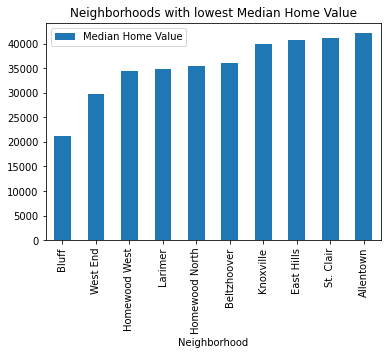

In [10]:
median_value.reset_index(inplace=True)

median_value_bar = median_value.iloc[:10].plot(kind='bar', x = 'Neighborhood', y = 'Median Home Value', title = "Neighborhoods with lowest Median Home Value")


The graph above shows the top 10 highest ranked neighborhoods in terms of property value. We can see that Bluff has the lowest property value out of the 10 and Allentown has the highest property value. We can see from our prevoius tables that there is a huge difference between property values in the top 10 ranked neighborhoods. Now all we need is a final and solid table that takes data from all of our previous tables and puts it all together. 

In [11]:
ranks = []

for i in range(len(median_value['Median Home Value'])):
    ranks.append(i + 1)
    
median_value.insert(2, "Rank", ranks, True)
median_value.head(10)

,index,Neighborhood,Rank,Median Home Value
0,10,Bluff,1,21200.0
1,86,West End,2,29800.0
2,42,Homewood West,3,34500.0
3,44,Larimer,4,34850.0
4,40,Homewood North,5,35450.0
5,8,Beltzhoover,6,36000.0
6,43,Knoxville,7,39900.0
7,27,East Hills,8,40700.0
8,77,St. Clair,9,41100.0
9,2,Allentown,10,42200.0


The table above lists each neighborhood and its property value in order. By examining this data, we can easily determine which neighborhood is the safest. 

# Conclusion

Based on the analysis conducted using data from our regional data center, the conclusion is that the safest neighborhoods in Pittsburgh, ranked in descending order based on property values, are as follows:

1. Allentown
2. St. Claire
3. East Hills
4. Knoxville
5. Beltzhoover

This ranking implies that neighborhoods with higher property values tend to be safer, providing valuable insights for individuals seeking secure residential areas within Pittsburgh.